# 1. Import Library

In [1]:
# Dataframe manipulation
import numpy as np
import pandas as pd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# generate classification report using predictions for categorical model
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn import (metrics,  linear_model, preprocessing)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, learning_curve, StratifiedKFold

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# 2. Import dataset

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')
print(df.shape)
df.head()

(690, 16)


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# 3. Data Preprocessing

### 3.1. Feature scaling

In [3]:
df = df.drop(['CustomerID'],axis =1)
df = df.reset_index(drop=True)

scaler = MinMaxScaler(feature_range = (0, 1))
selected_features = [var for var in df.columns if var not in ['Class']]

X_scaled = df[selected_features]
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))
X_scaled.columns = selected_features
print(X_scaled.shape)
X_scaled.head()

(690, 14)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158


### 3.2. Split data into X & y

In [4]:
X = X_scaled  #independent columns
y = df['Class']    #target column i.e price range

scaled_df = pd.concat([X,y],axis=1)

### Split data into train and test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)
X_train.shape, X_test.shape

((552, 14), (138, 14))

In [6]:
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

0.44565217391304346
0.4420289855072464


# 4. Predictive Model

### 4.1. Train and perform cross validation

In [7]:
from sklearn import svm
from sklearn.svm import SVC

model = svm.SVC(kernel = 'rbf')
kfold = KFold(n_splits = 10, random_state = 10)
scores = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
scores

array([0.80357143, 0.78571429, 0.87272727, 0.83636364, 0.90909091,
       0.85454545, 0.85454545, 0.85454545, 0.94545455, 0.83636364])

In [8]:
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()))

Accuracy: 85.53% (+/- 4.42%)


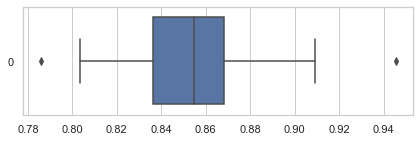

In [9]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

### 4.2. Training

In [10]:
from sklearn import svm
from sklearn.svm import SVC

model = svm.SVC(kernel = 'rbf',probability=True)
# train model
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [11]:
# default parameters
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### 4.3. Prediction

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### 4.3. Model Evaluation

#### Accuracy

In [13]:
accuracy_score(y_train, y_train_pred)

0.8768115942028986

In [14]:
accuracy_score(y_test, y_test_pred)

0.8695652173913043

#### Confusion matrix & Classification Report 

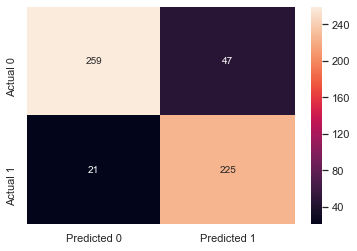

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df.index = (['Actual 0','Actual 1'])
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.88       306
           1       0.83      0.91      0.87       246

    accuracy                           0.88       552
   macro avg       0.88      0.88      0.88       552
weighted avg       0.88      0.88      0.88       552



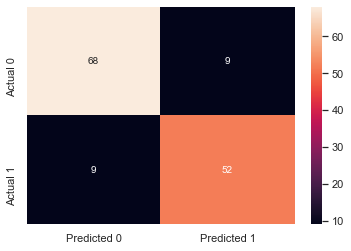

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df.index = (['Actual 0','Actual 1'])
sns.heatmap(cm_df, annot=True, fmt="d")
plt.show()

In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        77
           1       0.85      0.85      0.85        61

    accuracy                           0.87       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.87      0.87      0.87       138



#### ROC AUC Score

In [19]:
roc_auc_score(y_train, y_train_pred)

0.8805196875498167

In [20]:
roc_auc_score(y_test, y_test_pred)

0.8677879497551628

#### ROC Curve

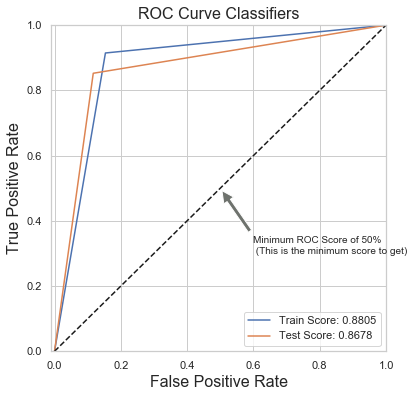

In [21]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, threshold = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

#### Precision-Recall curve

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.91')

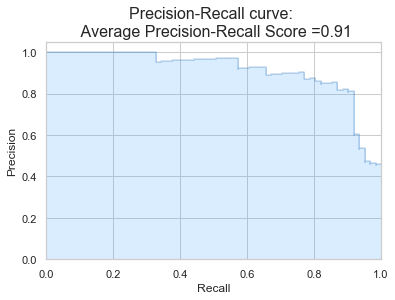

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = model.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

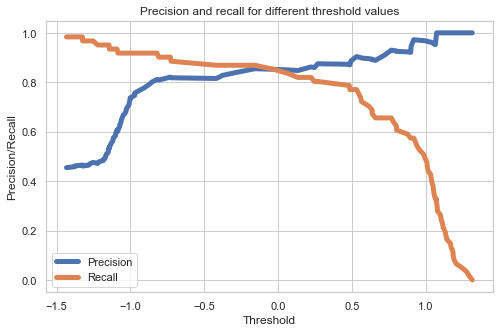

In [23]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.93')

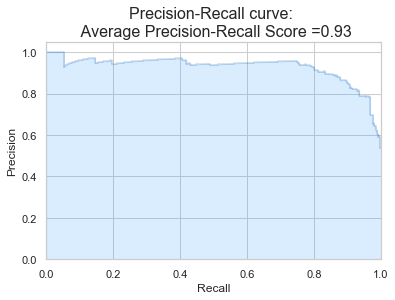

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = model.decision_function(X_train)
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

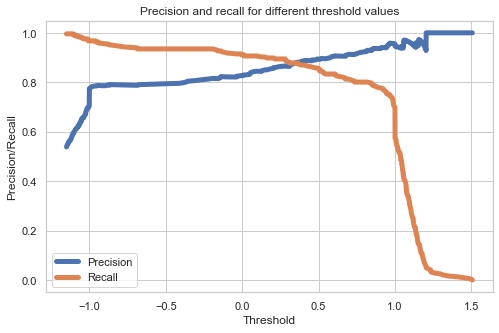

In [25]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

#### Summary

In [26]:
def ModelEvaluation(model,X_train,y_train,X_test,y_test,name):
    print('Model Evaluation of ' + name)

    print('-----------------------------------------------------------')
    print('Train set')
    print('Accuracy: ', accuracy_score(y_train, y_train_pred))
    print('ROC AUC Score: ', roc_auc_score(y_train, y_train_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_train,y_train_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_train, y_train_pred))
    
    print('-----------------------------------------------------------')
    print('Test set')
    print('Accuracy: ', accuracy_score(y_test, y_test_pred))
    print('ROC AUC Score: ', roc_auc_score(y_test, y_test_pred))
    cm_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred), index=model.classes_,columns=model.classes_)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print('Confusion matrix')
    print(cm_df)
    print(classification_report(y_test, y_test_pred))
    
ModelEvaluation(model,X_train,y_train,X_test,y_test,'NonLinearSVM')

Model Evaluation of NonLinearSVM
-----------------------------------------------------------
Train set
Accuracy:  0.8768115942028986
ROC AUC Score:  0.8805196875498167
Confusion matrix
True         0    1
Predicted          
0          259   47
1           21  225
              precision    recall  f1-score   support

           0       0.93      0.85      0.88       306
           1       0.83      0.91      0.87       246

    accuracy                           0.88       552
   macro avg       0.88      0.88      0.88       552
weighted avg       0.88      0.88      0.88       552

-----------------------------------------------------------
Test set
Accuracy:  0.8695652173913043
ROC AUC Score:  0.8677879497551628
Confusion matrix
True        0   1
Predicted        
0          68   9
1           9  52
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        77
           1       0.85      0.85      0.85        61

    accuracy         

### 4.4 Tuning hyper-parameters

In [28]:
param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'shrinking': [True, False],
    'gamma': ['auto', 1, 0.1],
    'coef0': [0.0, 0.1, 0.5]
}

grid_search = GridSearchCV(SVC(), param_grid = param_grid, scoring = 'accuracy', cv = 10, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=True ........
[CV]  C=1.0, coef0=0.0, gamma=auto,

[CV]  C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0

[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=False .....
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=False .....
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, 

[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=True .....
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.0, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[C

[CV]  C=1.0, coef0=0.1, gamma=auto, kernel=poly, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=auto, kernel=poly, shrinking=False ......
[CV]  C=1.0, coef0=0.1, gamma=auto, kernel=poly, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True ....
[CV]  C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True ....
[CV]  C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True ....
[CV]  C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True ....
[CV]  C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True ....
[CV]  C=1.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=True, total=   0.0s
[CV]

[CV]  C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True ..........
[CV]  C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True ..........
[CV]  C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True ..........
[CV]  C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True ..........
[CV]  C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True ..........
[CV]  C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=False .........
[CV]  C=1.0, coef0=0.1, gamma=1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=1, kernel=po

[CV]  C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True .........
[CV]  C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True .........
[CV]  C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True .........
[CV]  C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True .........
[CV]  C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True .........
[CV]  C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True .........
[CV]  C=1.0, coef0=0.1, gamma=0.1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.1, gamma=0.1, k

[CV]  C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=auto, kernel=linear, shrinking=False, total=   0.0s


[CV]  C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False .......
[CV]  C=1.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5

[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True ......
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=1.0, co

[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False ....
[CV]  C=1.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=False, total=   0.0s


[CV]  C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False .....
[CV]  C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False .....
[CV]  C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False .....
[CV]  C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False .....
[CV]  C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False .....
[CV]  C=10.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=auto, kernel=sigmoid, shrinking=True ...
[CV]  C=10.0, coef0=0.0, gamma=auto, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] 

[CV]  C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True .........
[CV]  C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True .........
[CV]  C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True .........
[CV]  C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True .........
[CV]  C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True .........
[CV]  C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True .........
[CV]  C=10.0, coef0=0.0, gamma=1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=1, ke

[CV]  C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False .......
[CV]  C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False .......
[CV]  C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False .......
[CV]  C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False .......
[CV]  C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False .......
[CV]  C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False .......
[CV]  C=10.0, coef0=0.0, gamma=0.1, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.

[CV]  C=10.0, coef0=0.1, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=auto, kernel=linear, shrinking=False ...
[CV]  C=10.0, coef0=0.1, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=auto, kernel=linear, shrinking=False ...
[CV]  C=10.0, coef0=0.1, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=auto, kernel=linear, shrinking=False ...
[CV]  C=10.0, coef0=0.1, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=auto, kernel=linear, shrinking=False ...
[CV]  C=10.0, coef0=0.1, gamma=auto, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[

[CV]  C=10.0, coef0=0.1, gamma=auto, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=10.0, coe

[CV]  C=10.0, coef0=0.1, gamma=1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=poly, shrinking=False ........
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=poly, shrinking=False, total=   0.1s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=poly, shrinking=False ........
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=poly, shrinking=False ........
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=True ......
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=True ......
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=True ......
[CV]  C=10.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1

[CV]  C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True .......
[CV]  C=10.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.

[CV]  C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True .......
[CV]  C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True .......
[CV]  C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True .......
[CV]  C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True .......
[CV]  C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True .......
[CV]  C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True .......
[CV]  C=10.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.

[CV]  C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=10.0, c

[CV]  C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=10.0, coef0=0.5, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=1

[CV]  C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=10.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=10.0, c

[CV]  C=50.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True ......
[CV]  C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True ......
[CV]  C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True ......
[CV]  C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True ......
[CV]  C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True ......
[CV]  C=50.0, coef0=0.0, gamma=auto, kernel=poly, shrinking=True, total=   0.0s
[CV] C=50.0, c

[CV]  C=50.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.1s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=rbf, shrinking=True ..........
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=rbf, shrinking=True ..........
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=rbf, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.0

[CV]  C=50.0, coef0=0.0, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.0, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True .....
[CV]  C=50.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True .....
[CV]  C=50.0, coef0=0.0, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=

[CV]  C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=50.0, coef0=0.0, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, c

[CV]  C=50.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=auto, kernel=poly, shrinking=True ......
[CV]  C=50.0, coef0=0.1, gamma=auto, kernel=poly, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=auto, kernel=poly, shrinking=True ......
[CV]  C=50.0, coef0=0.1, gamma=auto, kernel=poly, shrinking=True, total=   0.0s
[CV] C=50.0, c

[CV]  C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False, total=   0.1s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, c

[CV]  C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False .....
[CV]  C=50.0, coef0=0.1, gamma=1, kernel=sigmoid, shrinking=False, total=   0.0s
[CV] C=

[CV]  C=50.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=50.0, coef0=0.1, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.1, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV]

[CV]  C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=auto, kernel=rbf, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=auto, kernel=poly, shrinking=True ......
[CV]  C=50.0, coef0=0.5, gamma=auto, kernel=poly, shrinking=True, total=   0.0s
[CV] C=50.0, c

[CV]  C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.1s
[CV] C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=1, kernel=linear, shrinking=False, total=   0.0s
[CV] C=50.0, c

[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True .....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True .....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True .....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True .....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True .....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True .....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=linear, shrinking=True, total=   0.0s
[CV] C=

[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False ......
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=poly, shrinking=False, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV] C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True ....
[CV]  C=50.0, coef0=0.5, gamma=0.1, kernel=sigmoid, shrinking=True, total=   0.0s
[CV]

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:   30.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0], 'coef0': [0.0, 0.1, 0.5],
                         'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [29]:
# Print the bext score found
grid_search.best_score_

0.8643181818181818

In [30]:
best_model = grid_search.best_estimator_
best_model

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 85.34% (+/- 8.19%)


In [32]:
scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 86.43% (+/- 8.92%)


In [33]:
scores

array([0.78571429, 0.83928571, 0.85454545, 0.81818182, 0.92727273,
       0.87272727, 0.83636364, 0.92727273, 0.87272727, 0.90909091])

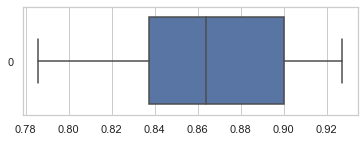

In [34]:
plt.figure(figsize=(6,2))
sns.boxplot(data=scores, orient='h')
plt.show()

In [35]:
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [36]:
ModelEvaluation(best_model,X_train,y_train,X_test,y_test,'NonLinearSVM')

Model Evaluation of NonLinearSVM
-----------------------------------------------------------
Train set
Accuracy:  0.875
ROC AUC Score:  0.8776901004304161
Confusion matrix
True         0    1
Predicted          
0          261   45
1           24  222
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       306
           1       0.83      0.90      0.87       246

    accuracy                           0.88       552
   macro avg       0.87      0.88      0.87       552
weighted avg       0.88      0.88      0.88       552

-----------------------------------------------------------
Test set
Accuracy:  0.8623188405797102
ROC AUC Score:  0.8612944432616564
Confusion matrix
True        0   1
Predicted        
0          67  10
1           9  52
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        77
           1       0.84      0.85      0.85        61

    accuracy                      

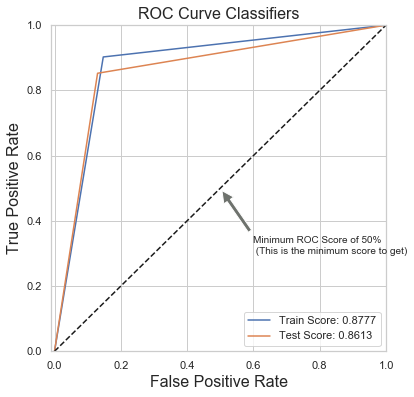

In [37]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, threshold = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, threshold = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(6,6))
plt.title('ROC Curve Classifiers', fontsize=16)
plt.plot(fpr_train, tpr_train, label= 'Train Score: {:.4f}'.format(roc_auc_score(y_train, y_train_pred)))
plt.plot(fpr_test, tpr_test, label= 'Test Score: {:.4f}'.format(roc_auc_score(y_test, y_test_pred)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
        
plt.show()

In [38]:
y_score = best_model.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)

precision_recall_df = pd.DataFrame([precision[0:len(threshold)],recall[0:len(threshold)],threshold]).T
precision_recall_df.columns = ['precision','recall','threshold']
precision_recall_df.head(6)

,precision,recall,threshold
0,0.491935,1.000000,-1.080654
1,0.487805,0.983607,-1.076746
2,0.483607,0.967213,-1.076311
3,0.479339,0.950820,-1.075556
4,0.483333,0.950820,-1.074105
5,0.478992,0.934426,-1.069538


Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.92')

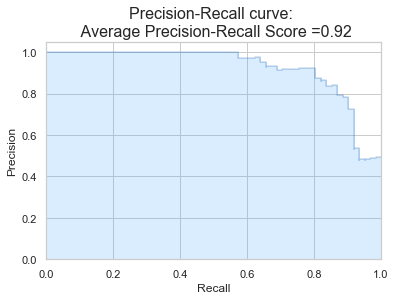

In [39]:
plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.92')

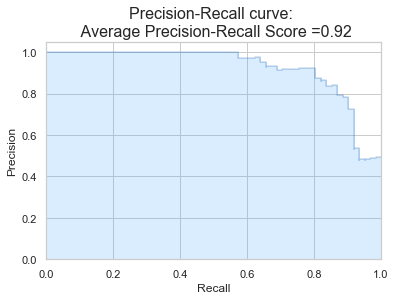

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = best_model.decision_function(X_test)
precision, recall, threshold = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

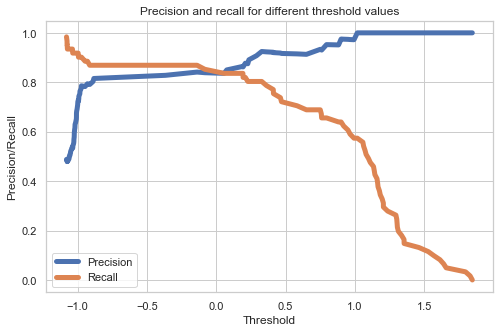

In [41]:
sns.set(style = 'whitegrid',context = 'notebook')
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

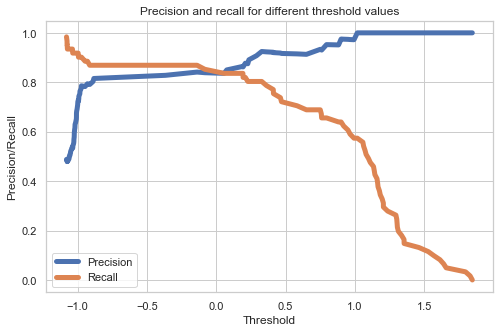

In [42]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.91')

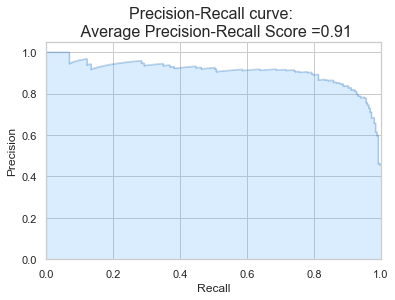

In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_score = best_model.decision_function(X_train)
precision, recall, threshold = precision_recall_curve(y_train,y_score)
average_precision = average_precision_score(y_train, y_score)


plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

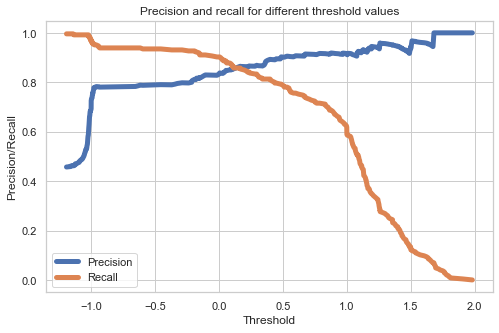

In [44]:
plt.figure(figsize=(8,5))
plt.plot(threshold, precision[1:], label="Precision",linewidth=5)
plt.plot(threshold, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()